# Linear Regression VS Linear Neuronal Network for Regression

  En este Notebook Participare en el concurso de Kaggle ---.

## Contenido
  - Exploración de los datos
  - Solución mediante método de RSE Regresion Lineal
  - Solución mediante método Neuronal Network (NNR)
  - Solución mediante Multiple Layer Perceptron (MLP)
  -

In [32]:
#Imports
import numpy as np
import pandas as pd
import matplotlib as mpt

In [33]:
df = pd.read_csv('./train.csv',index_col="id")
df

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0


In [34]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [35]:
df[:1]

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0


In [36]:
df.shape

(74111, 28)

### Price distribution

In [37]:
prices = df[['log_price']]
prices

,log_price
id,
6901257,5.010635
6304928,5.129899
7919400,4.976734
13418779,6.620073
3808709,4.744932
...,...
14549287,4.605170
13281809,5.043425
18688039,5.220356


## Histograma
Realizamos un histograma para ver la distribución de los precios.

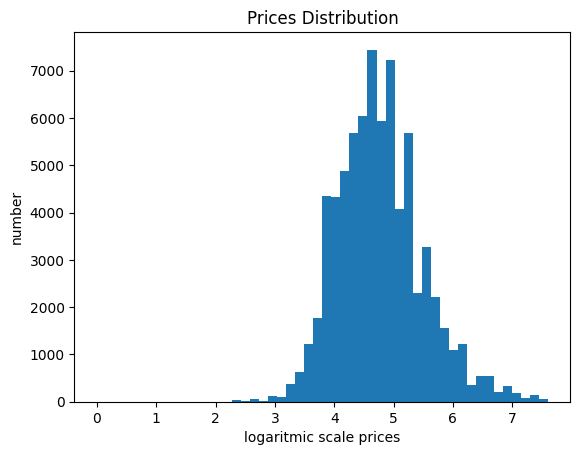

In [64]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.hist(prices,bins=50)
plt.title("Prices Distribution")
plt.xlabel("logaritmic scale prices")
plt.ylabel("number")
plt.show()
plt.show()

Mapeamos la latitud y longitud para preciar cual es la distribución de las casas

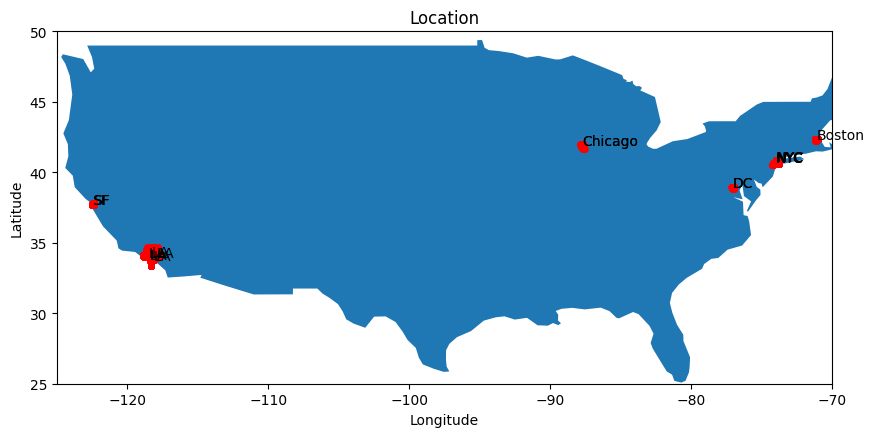

In [39]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

fig,ax=plt.subplots(figsize=(10, 6))

geometry = [
    Point(xy) for xy in zip(df['longitude'], df['latitude'])
    ]


gdf = GeoDataFrame(df, geometry=geometry)
GeoDataFrame(world.loc[4,:]).T["geometry"].plot(ax=ax)
ax.set_xlim(-125, -70)
ax.set_ylim(25, 50)

gdf.plot(ax=ax, marker='o', color='red', markersize=15);

for idx, row in df[:18].iterrows():
    ax.annotate(row['city'], (row['longitude'], row['latitude']))

plt.title("Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Feature selection

- Voy a quitar las siguientes Features:  

 |           Feature|Razón                                       |  
 |------------------|--------------------------------------------|  
 |Latitud y Longitud|Ya tenemos el nombre de la ciudad           |
 |Descripción|Al ser textos tan diferentes no es fácil de trabajar en regression|  
 |first_review|Es texto|  
 |thumbnail_url|Son URL que no tienen relación con el precio|  
 |zipcode|Es un código postal, al ya tener las ciudades no creo que sea importante|  
 |name|Son todos nombre únicos que no influencian el precio|  
 -----

In [40]:
df = df.drop(columns=['latitude', 'longitude','description','first_review','thumbnail_url', 'zipcode','name'])
df.shape

(74111, 21)

## Eliminar filas con campos NaN

Prácticamente el 40% de las filas del dataset tienen algún campo completado con NaN. Como se trata de muchas filas, decidí que eliminaré la menor cantidad posible.

In [41]:
filas_con_nan = df.isna().any(axis=1)
cantNan = filas_con_nan.sum()

In [42]:
#Porcentaje de filas que tienen almenos un NaN
cantNan / df.shape[0]

0.4185613471684365

In [43]:
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

Features que pueden admitir un valor pordefecto:
- bathrooms : 0
- host_has_profile_pic: False
- host_identity_verified: False
- host_response_rate: 0
- review_scores_rating: 0
- bedrooms: 0
- beds: 0

Las Features con Nan que no voy a especular son:
- host_since
- last_review
- neighbourhood

In [44]:
df.loc[df["bathrooms"].isna(), "bathrooms"] = 0
df.loc[df["host_has_profile_pic"].isna(), "host_has_profile_pic"] = 'f'
df.loc[df["host_identity_verified"].isna(), "host_identity_verified"] = 'f'
df.loc[df["host_response_rate"].isna(), "host_response_rate"] = 0
df.loc[df["review_scores_rating"].isna(), "review_scores_rating"] = 0
df.loc[df["bedrooms"].isna(), "bedrooms"] = 0
df.loc[df["beds"].isna(), "beds"] = 0

In [45]:
filas_con_nan = df.isna().any(axis=1)
cantNan = filas_con_nan.sum()
cantNan / df.shape[0]

0.2844651941007408

Pudimos bajar casi un 10% la cantidad de filas con NaN en sus campos.
Ahora eliminaremos los que quedan.

In [46]:
df = df.dropna()
df.shape

(53029, 21)

### Normalización de Features

In [47]:
# Variable Numerica
df[['accommodates', 'number_of_reviews', 'bedrooms', 'beds', 'bathrooms']] = df[[
    'accommodates', 'number_of_reviews', 'bedrooms', 'beds', 'bathrooms']].astype(int)

# Normalizar Variables entre 0 y 1.
df['host_response_rate'] = df['host_response_rate'].apply(
    lambda x: float(str(x).strip("%"))/100)

max_val = float(df['review_scores_rating'].max())
min_val = float(df['review_scores_rating'].min())
df['review_scores_rating'] = (
    (0.99 - 0.01) * (df['review_scores_rating'] - min_val) / (max_val - min_val)) + 0.01

# Varaible categoricas Nominales a Numericas
df['property_type'] = pd.Categorical(df['property_type']).factorize()[0]
df['room_type'] = pd.Categorical(df['room_type']).factorize()[0]
df['bed_type'] = pd.Categorical(df['bed_type']).factorize()[0]
df['city'] = pd.Categorical(df['city']).factorize()[0]
df['neighbourhood'] = pd.Categorical(df['neighbourhood']).factorize()[0]

# Varaibles Date a Ordinal
df['host_since'] = (pd.to_numeric(pd.to_datetime(
    df['host_since'])) / pow(10, 11)).apply(int)
df['last_review'] = (pd.to_numeric(pd.to_datetime(
    df['last_review'])) / pow(10, 11)).apply(int)

# Categoricos Ordinales a Numerica
df['cancellation_policy'] = df['cancellation_policy'].replace({
    'flexible': 0,
    'moderate': 1,
    'strict': 2,
    'super_strict_30': 3,
    'super_strict_60': 4
})

# Normalizar Booleanos a Numerica
df['cleaning_fee'] = df['cleaning_fee'].replace({
    False: 0,
    True: 1
})

# Normalizar a True o False y luego a Numerica
df[['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']] = df[[
    'host_has_profile_pic',
    'host_identity_verified',
    'instant_bookable'
]].replace({'f': 0, 't': 1})

### Amenities encoding
Las amenities son un conjunto de etiquetas que se le asignan a cada casa o departamento que lo describen. Como creo que tienen una fuerte influencia en el precio he decidido hacer un one-hot encoding para poder trabajarlas numéricamente. Esto resultara en una mayor cantidad de Features.

In [48]:
#Funciones para "escanear" las etiquetas
def cleanElement(L):
    for i in range(0,len(L)):
        L[i] = L[i].strip(" ").strip("\"\"")
    return L

def toList(amenities):
    l = amenities.strip("{}").strip(" ").split(",")
    return l

categories = df["amenities"].apply(toList)

#Obtener un conjunto de las etiquetas
allCategories = set();
for category in categories.items():
    allCategories.update(set(category[1]))
allCategories.discard('')

In [49]:
catdf = pd.DataFrame()
for cat in list(allCategories):
    catdf = pd.concat([catdf,categories.apply(lambda x: x.count(cat)).rename(cat)],axis=1)
catdf.shape

(53029, 130)

In [50]:
df = df.drop(columns=['amenities'])
df = pd.concat([df,catdf],axis=1)
df.shape

(53029, 150)

# Separando el conjunto en training y testing

In [51]:
df.sample(frac=0.7,replace=False,random_state=17)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,"""Air conditioning""","""Washer / Dryer""","""Safety card""","""Laptop friendly workspace""",Beachfront,Refrigerator,"""Children’s dinnerware""",Crib,"""Cooking basics""","""Wide clearance to shower & toilet"""
13685932,3.367296,0,1,1,1,0,0,0,5,1,...,0,0,0,0,0,0,0,0,0,0
10311094,4.007333,0,2,2,1,4,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6168663,5.003946,2,0,2,1,0,2,1,3,1,...,0,0,0,1,0,0,0,0,0,0
17606167,4.317488,0,0,2,1,0,0,1,3,1,...,1,0,0,1,0,0,0,0,0,0
16414506,4.867534,0,0,2,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14880301,5.010635,0,0,3,1,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
11065341,5.416100,0,0,3,1,0,2,1,0,1,...,1,0,1,1,0,0,0,0,0,0
656963,3.806662,0,1,2,1,0,0,0,4,1,...,1,0,0,0,0,0,0,0,0,0
684324,3.912023,0,1,1,1,0,2,1,0,1,...,1,0,0,1,0,0,0,0,0,0


In [52]:
# Datos de entrenamiento
train_data = df.sample(frac=0.7,replace=False,random_state=17)
train_labels = train_data['log_price']
train_data = train_data.drop(columns=['log_price'],axis=1)
# Datos de prueba
test_data = df.drop(labels=train_data.index, axis=0)
test_labels = test_data['log_price'] 
test_data = test_data.drop(columns=['log_price'],axis=1)

## Regresión Lineal Simple

In [53]:
import statsmodels.api as sm

# Ordinary Least Square

model = sm.OLS(train_labels,train_data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          3.419e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):                        0.00
Time:                        20:13:15   Log-Likelihood:                         -20185.
No. Observations:               37120   AIC:                                  4.066e+04
Df Residuals:                   36977   BIC:                                  4.187e+04
Df Model:                         143                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
property_type                                    0.0051      0.001      4.887      0.000       0.003       0.007
room_type                                       -0.5561      0.005   -106.443      0.000      -0.566      -0.546
accommodates                                     0.0688      0.002     31.321      0.000       0.064       0.073
bathrooms                                        0.1067      0.005     20.474      0.000       0.097       0.117
bed_type                                        -0.0001      0.005     -0.021      0.984      -0.011       0.011
cancellation_policy                              0.0181      0.003      6.135      0.000       0.012       0.024
cleaning_fee                                     0.0059      0.006      1.015      0.310      -0.005       0.017
city                                            -0.0092      0.002     -5.448      0.000      -0.013      -0.006
host_has_profile_pic                             0.2361      0.051      4.626      0.000       0.136       0.336
host_identity_verified                          -0.0077      0.005     -1.463      0.144      -0.018       0.003
host_response_rate                              -0.0850      0.007    -12.816      0.000      -0.098      -0.072
host_since                                   -2.256e-08   4.29e-09     -5.262      0.000    -3.1e-08   -1.42e-08
instant_bookable                                -0.0353      0.005     -6.746      0.000      -0.046      -0.025
last_review                                   3.038e-07    5.5e-09     55.249      0.000    2.93e-07    3.15e-07
neighbourhood                                   -0.0005   2.15e-05    -21.323      0.000      -0.001      -0.000
number_of_reviews                               -0.0005   5.97e-05     -8.934      0.000      -0.001      -0.000
review_scores_rating                             0.1542      0.016      9.433      0.000       0.122       0.186
bedrooms                                         0.1566      0.004     37.349      0.000       0.148       0.165
beds                                            -0.0370      0.003    -11.383      0.000      -0.043      -0.031
"Baby monitor"                                   0.0317      0.060      0.533      0.594      -0.085       0.148
"Hot tub"                                        0.0240      0.009      2.561      0.010       0.006       0.042
"Coffee maker"                                   0.0268      0.019      1.399      0.162      -0.011       0.064
"24-hour check-in"                              -0.0100      0.006     -1.745      0.081      -0.021       0.001
Bathtub                                       

- P>|t|: Esta notación que mustrar la probabilidad asociada al valor absoluto de la estadística t (|t|) para un coeficiente específico en un modelo de regresión. La estadística t se utiliza para evaluar la significancia estadística de un coeficiente en el modelo.

- Interpretación: La probabilidad P>|t| representa la probabilidad de observar un valor absoluto de la estadística t igual o más extremo que el valor observado, bajo la suposición de que el coeficiente en cuestión no tiene efecto en la variable de respuesta. 
**En otras palabras, es la probabilidad de que el coeficiente sea igual a cero (sin efecto) en el modelo**.

- Valores Pequeños: Un valor pequeño de P>|t| (generalmente menor que el nivel de significancia α, como 0.05) sugiere que el coeficiente es estadísticamente significativo. Esto significa que hay evidencia suficiente para concluir que el coeficiente no es igual a cero y que tiene un efecto en la variable de respuesta.

- Valores Grandes: Un valor grande de P>|t| (mayor que α) sugiere que el coeficiente no es estadísticamente significativo. Esto implica que no hay evidencia suficiente para concluir que el coeficiente tiene un efecto significativo en la variable de respuesta, y podría considerarse como no relevante.

In [54]:
prediction = result.get_prediction(test_data)
prediction.predicted_mean

array([5.14604996, 4.39206557, 4.26028302, ..., 5.36990015, 4.11547972,
       4.48751899])

### Visualización de resultados

ValueError: Could not interpret input 'price'

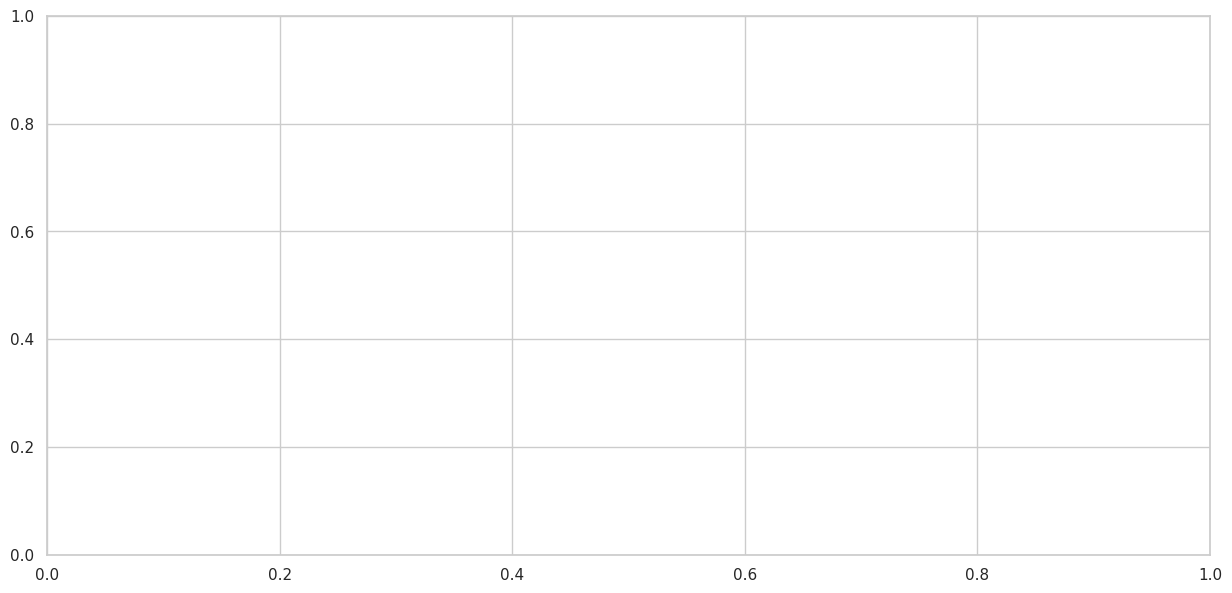

In [104]:
sb.set_theme(style="whitegrid", palette="vlag")
fig, ax = plt.subplots(figsize=(15,7))
sb.boxplot(
    data=test_labels,
    x="price",
    orient="h",
    width=0.7,
    color='blue'
);
ax.set_xlabel("prices")
ax.set_title("Linear Regresion Boxplot")

### Ridge
### Lasso

## Regresión Lineal con Redes Neuronales

### Ridge
### Lasso

## Refresión lineal con Preceptron de multiples Capas

## Comparación